# Introduction

Mathematical model is an abstract, mathematically based description of a physical system. A model can be useful for studying the impacts of various components, explaining how a system works, and forecasting behavior.

**Population model** is one of the mathematical models. In this report, we'll make population predictions for the mayfly species, called **Mayfly Model**. The species has a very brief lifespan; after mating, females deposit eggs, and then die off within a few days. As a result, only one generation of mayflies can be present at any given time since many mayfly generations cannot coexist.

Make an assumption that the mayfly population ($y_n$) in year $n$ depends on the population ($y_{n-1}$) in the prior year $n-1$. Following this assumption, we can build a simple population model called the mayfly model. By the linear function $g(x)=a(M-x)$ and the condition $a>0$, we can derive the equation as $x_n=a(M-x_{n-1})x_{n-1}$. According to the equation $y_n=\frac{x_n}{M}$, we can combine two parameters $M$ and $a$ as one single parameter $b$. Therefore, the equation of Mayfly Model is:

$$y_n=b(1−y_{n−1})y_{n−1}$$

where $0\leq b \leq 4$, $0\leq$ $y_n$ $\leq 1$. 

The objective of this project is to demonstrate that the respective effects of $b$ and $y_0$ on the population of mayflies and analyze bahavior of the behavior of the mayfly model for various values of $b$ and $y_0$.

## Part 1. Function of Mayfly Model



Creating the Python function of Mayfly model should come first. It applies to the equation of Mayfly population. By definition, $b$ is a growth parameter (the growth rate of population times the maximal size). The initial mayfly population is denoted by $y_0$. $T$ value means iterations. These three variables would be the arguments of the function `mayfly_model(b,y0,T)`. It will return a list of mayfly population in a time range starting from the given initial population $y_0$ to the population of $N^{th}$ year.

In [1]:
def mayfly_model(b,y0,T):
    ylist = [y0]
    
    for n in range(T):
        new_y = b * (1 - ylist[-1]) * ylist[-1]
        ylist.append(new_y)
    return ylist

## Part 2. Mayfly Model Plot

It can be observed from the mayfly equation that $b$ and $y_0$ are important factors in determining the mayfly population in a generation. We can make an interactive plot that adjusts $b$ and $y_0$ values at the same time. The plot of Double Slider is suitable to present the influence of different $b$ and $y_0$. 

In order to make the mayfly population simulation model, we need to import the `Slider` from `matplotlib.pyplot` and the command `matplotlib notebook`. For the initial plot, we can set up that $b=0$, $y_0=0$ and the time range is $20$ years. Then, create $2$ sliders for $b$ and $y0$ where $0\leq b \leq 4$, $0\leq$ $y_0$ $\leq 1$. Finally, write a function `update(args)` to update the bae plot function by excuted every time the value adjusted by the slider.

<IPython.core.display.Javascript object>


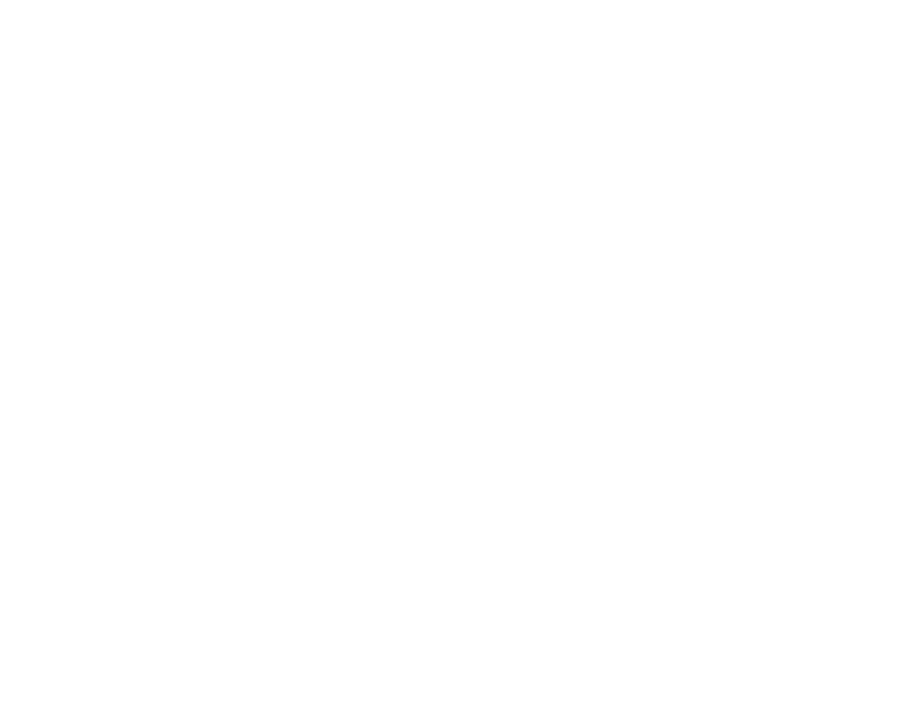

In [2]:
%matplotlib notebook

from matplotlib.widgets import Slider                # import the Slider widget
import matplotlib.pyplot as plt                      # import the matplot


fig = plt.figure(figsize=(10,8))                     # set the figure size

b  = 0                                               # set up the initial plot                 
y0 = 0
T = 50

y0_min = 0                                           # the minimial value of the paramater y_0
y0_max = 1                                           # the maximal value of the paramater y_0
y0_init = 0                                          # the value of the parameter y_n to be used initially, when the graph is created

b_min = 0                                            # the minimial value of the paramater b
b_max = 4                                            # the maximal value of the paramater b
b_init = 0                                           # the value of the parameter b to be used initially, when the graph is created


liss_ax = plt.axes([0.1, 0.2, 0.8, 0.65])            # create the general layount of the figure
y0_slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])      # with two axes objects: one for the plot of the function
b_slider_ax = plt.axes([0.1, 0, 0.8, 0.05])          # and the other for the slider




plt.axes(liss_ax)                                    # in plot_ax we plot the function with the initial value of the parameter a
plt.title('$Mafly$ $Model$ $Plot$')                  # give a title for this plot
liss_plot, = plt.plot(mayfly_model(b,y0,T), 'r-o')   # plot function with red line and dot markers.
plt.ylim(-0.2, 1.2)                                  # Set a limit for y for better observation
plt.xlabel('$Time$')                                 # name of x-axis
plt.ylabel('$Population$')                           # name of y-axis



y0_slider = Slider(y0_slider_ax,                     # the axes object containing the slider
                  'y0',                              # the name of the slider parameter
                  y0_min,                            # minimal value of the parameter
                  y0_max,                            # maximal value of the parameter
                  valinit=y0_init                    # initial value of the parameter
                 )

b_slider = Slider(b_slider_ax,                       # the axes object containing the slider
                  'b',                               # the name of the slider parameter
                  b_min,                             # minimal value of the parameter
                  b_max,                             # maximal value of the parameter
                  valinit=b_init                     # initial value of the parameter
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(args):
    liss_plot.set_ydata(mayfly_model(b_slider.val, y0_slider.val, T)) # set new y-coordinates of the plotted points
    fig.canvas.draw_idle()                                            # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
y0_slider.on_changed(update)
b_slider.on_changed(update)

plt.show()

By adjusting the sliders, we can conclude that $b$ values differ more than $y_0$ values do in their impact on the mayfly population. Let us produce a linear image representing several distinct $b$ values to examine the trend of the total population of mayflies influenced by different $b$ values in order to more clearly see the changes of the total population caused by various $b$ values.

## Part 3. Differernt $b$ Values with Fixed $y_0$ Value

Assign a base value for $y_0$. Then arrange the time range of the first generation and the next ten generations for a total of eleven generations. 

In [3]:
import numpy as np      # import numpy

y0 = 0.2                # set up the base values
T = 10
list = np.arange(11)    # eleven points we want for the years

Since $1≤b≤4$, we divide the range of $b$ equally into $9$ parts. To observe how every $b$ increasing of $0.5$ affects the mayfly population. In other words, we use slight changes in $b$ to see the effect of each stage of $b$ on mayfly population. `x` is all the values of $b$ that we're going to use for the graph ($b=0, 0.5, 1...$), applied `np.linspace` to get it. Use a `for` loop to collect each list of mayfly population with different $b$ and the fixed $y_0$ value.

In [4]:
x = np.linspace(0,4,9) 

List1 = []
for b in x:
    if b <= 4:
        ylist = mayfly_model(b,y0,T)
        List1.append(ylist)
        List1

With the x-axis representing the eleven generations and the y-axis representing the mayfly population for that year, the command below is used to create a linear image exhibiting nine different population trends affected by various $b$ values.

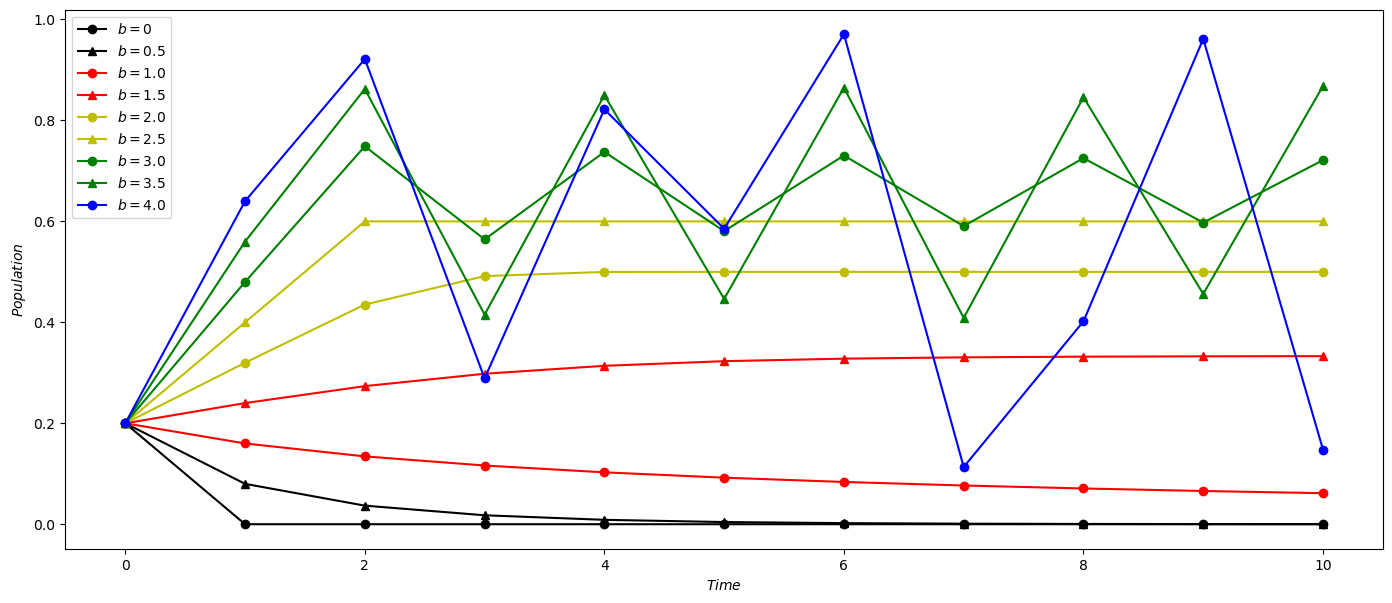

In [5]:
%matplotlib inline                                        
import matplotlib.pyplot as plt
plt.figure(figsize=(17,7))                    # set figure size

plt.plot(list,List1[0],'k-o',label='$b=0$')   # plot the line for b = 0
plt.plot(list,List1[1],'k-^',label='$b=0.5$') # plot the line for b = 0.5
plt.plot(list,List1[2],'r-o',label='$b=1.0$') # plot the line for b = 1.0
plt.plot(list,List1[3],'r-^',label='$b=1.5$') # plot the line for b = 1.5
plt.plot(list,List1[4],'y-o',label='$b=2.0$') # plot the line for b = 2.0
plt.plot(list,List1[5],'y-^',label='$b=2.5$') # plot the line for b = 2.5
plt.plot(list,List1[6],'g-o',label='$b=3.0$') # plot the line for b = 3.0
plt.plot(list,List1[7],'g-^',label='$b=3.5$') # plot the line for b = 3.5
plt.plot(list,List1[8],'b-o',label='$b=4.0$') # plot the line for b = 4.0

plt.xlabel('$Time$')                          # title x-axis as Time 
plt.ylabel('$Population$')                    # title x-axis as Population 

plt.legend()

The above linear graph makes it clear that the mayfly population as a whole diverges, creating a pattern of oscillation between highs and lows when $3≤b≤4$. However, when $0≤b<3$, the mayfly population as a whole converges to a stable population. Furthermore, we can see that the population finally converges to $0$ when $b$ is equal to $0$.

## Part 4. Fixed $b$ Value and Different $y_0$ Values

Even though we knew that the effect of the change of the $b$ value is greater than $y_0$, let's look at in the way of changing $y_0$ value on the trend for mayfly population while fixing a large value of $b$. To see if we can come up with a range of $y_0$ that makes the mayfly population fluctuate a lot.

Assign a base value for $b$. Then arrange the time range of the first generation and the next ten generations for a total of eleven generations. 

In [6]:
b = 3.7
T = 10
list = np.arange(11)

Since $0≤y_0≤1$, we divide the range of $y_0$ equally into $9$ parts. To observe how every $y_0$ increasing of $0.125$ affects the mayfly population. In other words, we use slight changes in $b$ to see the effect of each stage of $b$ on mayfly population. `y` is all the values of $y_0$ that we're going to use for the graph ($y_0=0, 0.125, 0.25...$), applied `np.linspace` to get it. Use a `for` loop to collect each list of mayfly population with different $y_0$ and the fixed $b$ value.

In [7]:
y = np.linspace(0,1,9)

List2 = []
for y0 in y:
    if y0 <= 1:
        ylist = mayfly_model(b,y0,T)
        List2.append(ylist)
        List2

With the x-axis representing the eleven generations and the y-axis representing the mayfly population for that year, the command below is used to create a linear image exhibiting nine different population trends affected by various $y_0$ values.

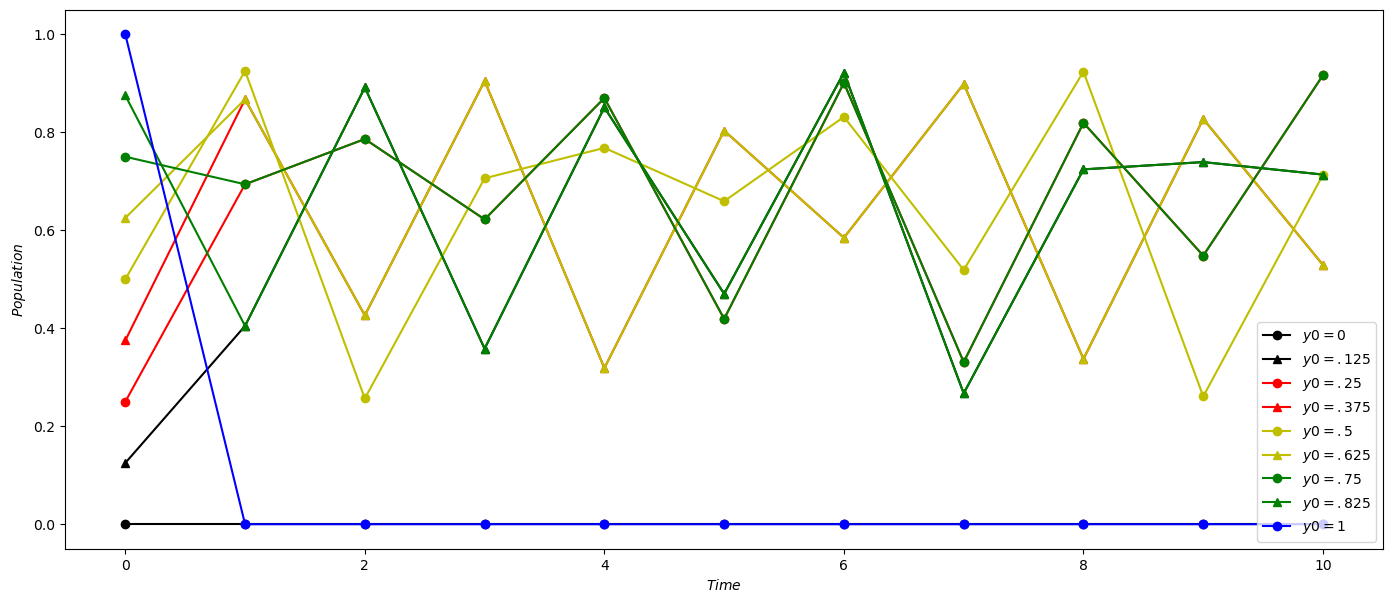

In [8]:
plt.figure(figsize=(17,7))                    # set figure size

plt.plot(list,List2[0],'k-o',label='$y0=0$')
plt.plot(list,List2[1],'k-^',label='$y0=.125$')
plt.plot(list,List2[2],'r-o',label='$y0=.25$')
plt.plot(list,List2[3],'r-^',label='$y0=.375$')
plt.plot(list,List2[4],'y-o',label='$y0=.5$')
plt.plot(list,List2[5],'y-^',label='$y0=.625$')
plt.plot(list,List2[6],'g-o',label='$y0=.75$')
plt.plot(list,List2[7],'g-^',label='$y0=.825$')
plt.plot(list,List2[8],'b-o',label='$y0=1$')

plt.xlabel('$Time$')
plt.ylabel('$Population$')

plt.legend()

In fact, from this linear graph, we can see that except for the extremes of $y_0=0$ and $y_0=4$, which would cause the mayfly population to converge to 0, the other $y_0$ values would cause the population trend to fluctuate significantly.

## Part 5. Population Comparison Under Controlling Variables

Through Parts 3 and Part 4, we assure the range of $b$ values and $y_0$ values that make the trend of mayfly population fluctuate most obviously. Sequently, we can utilize the control variable method to inspect these representative values.

Set a longer time span, which allows us to better observe trends in the mayfly population.

In [9]:
t = np.arange(51)                    # time span for x-axis

Let $b$ and $y_0$ to be the values given below.

In [10]:
m1 = mayfly_model(2.9, 0.25, 50)     # mayfly population when b=2.9, y0=0.25
m2 = mayfly_model(2.9, 0.50, 50)     # mayfly population when b=2.9, y0=0.50
m3 = mayfly_model(2.9, 0.75, 50)     # mayfly population when b=2.9, y0=0.75
m4 = mayfly_model(3.0, 0.55, 50)     # mayfly population when b=3.0, y0=0.55
m5 = mayfly_model(3.4, 0.55, 50)     # mayfly population when b=3.4, y0=0.55
m6 = mayfly_model(3.8, 0.55, 50)     # mayfly population when b=3.8, y0=0.55

Create the $2\times3$ grid subplots by `plt.subplot` function.

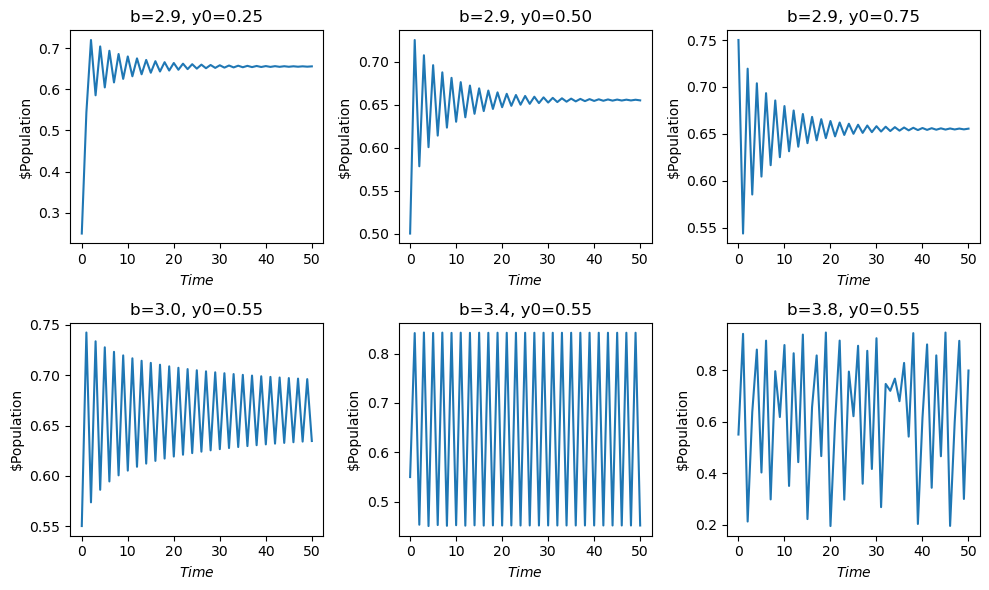

In [11]:
plt.figure(figsize = (10,6))         # set figure size

plt.subplot(2,3,1)                   # create the first subplot in the 2x3 grid for b=2.8, y0=0.25.
plt.plot(t,m1)                       # plot the function
plt.title('b=2.9, y0=0.25')          # give a title for the subplot
plt.xlabel('$Time$')                 # label the x-axis
plt.ylabel('$Population')            # label the y-axis

plt.subplot(2,3,2)                   # repeat for the remaining five subplots
plt.plot(t,m2)
plt.title('b=2.9, y0=0.50')
plt.xlabel('$Time$')
plt.ylabel('$Population')

plt.subplot(2,3,3)
plt.plot(t,m3)
plt.title('b=2.9, y0=0.75')
plt.xlabel('$Time$')
plt.ylabel('$Population')

plt.subplot(2,3,4)
plt.plot(t,m4)
plt.title('b=3.0, y0=0.55')
plt.xlabel('$Time$')
plt.ylabel('$Population')

plt.subplot(2,3,5)
plt.plot(t,m5)
plt.title('b=3.4, y0=0.55')
plt.xlabel('$Time$')
plt.ylabel('$Population')

plt.subplot(2,3,6)
plt.plot(t,m6)
plt.title('b=3.8, y0=0.55')
plt.xlabel('$Time$')
plt.ylabel('$Population')

plt.tight_layout()                   # make the subplot fit closely and appear more aesthetically       

Combined with the linear image above, we can clearly see that when $b=2.9$, the mayfly population model always fluctuates violently in the first $30$ generations and finally converges to a stable amount. The larger the initial population ($y_0$), the smaller the final amount that converges to stability.

When $b$ is selected within the range of $3≤b≤4$, the population model diverges into an up and down oscillation pattern. But the oscillation pattern are hard to see in just a few pictures. When $b=3$, the fluctuation amplitude of the population model decreases gradually, and even tends to be relatively stable. When $b=3.4$, the fluctuation amplitude of this time span is stable and regular. The number of people has fluctuated wildly from year to year and the numbers are the same; When $b=3.8$, the turbulence of the population model is completely irregular. Except for a relatively small fluctuation between the $30^{th}$ generation and the $40^{th}$ generation, the rest are all ups and downs, but the turbulence law is not single.


## Conclusion

In this report, we were able to establish a mayfly population forecast model for a time period, which was based on the mayfly population equation. With various $b$ and $y_0$ values, the mayfly population prediction models exhibit various behavioral tendencies. The largest and most evident alteration to the population model is brought about by the fact that the $b$ value, a growth parameter of change, is the product of the growth rate or decline rate and the maximum population that the environment can support. Whereas $3≤b≤4$ causes the model to diverge, $0≤b<3$ causes the model to converge to a fixed population.

The other variable, $y_0$, on the other hand, changes and influences the mayfly population model only slightly because its value denotes the model's initial condition. For dynamic systems, the model's initial state has little bearing on how it will evolve in the future. However, the population model only slightly impacted by the value of $y_0$. When the $b$ value is set to $3≤b≤4$, the distance between the initial $y_0$ value and the fixed population will define the model's initial oscillation amplitude and the time it takes to reach the fixed population.

In order to better understand and anticipate the mayfly population, it is expecting to explore the regularity of the pattern generated by $3≤b≤4$.

## Reference

[Mathematics model](https://en.wikipedia.org/wiki/Mathematical_model)


[Population model and mayfly model](https://en.wikipedia.org/wiki/Mathematical_model)